#Funciones de Activación

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Constryamos un conjunto de valores espaciados uniformemente dentro de
# un intervalo [-6, 6], con un espaciado de 0.1 entre valores:
x = np.arange(-6, 6, 0.1)

###Linear

* Tienen ciertas limitaciones en términos de capacidad de representación y  capacidad de aprendizaje.

* Las funciones de activación lineales son útiles en situaciones donde se necesita una transformación lineal simple, como en modelos lineales.



In [ ]:
def linear(x):
    a = []
    for item in x:
        a.append(item)
    return a

y = linear(x)

plt.plot(x,y)
plt.grid()
plt.show()

###Sigmoid

Ventajas:

*   Comprime las entradas en un rango acotado entre 0 y 1.
*   Es diferenciable en todo su rango.
*   Es más suave que las funciones de activación escalón o umbral.

Desventajas:

*   Desvanecimiento de gradientes.
*   No está centrada en cero.
*   Tiende a producir salidas no suficientemente esparsas.





In [ ]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

y = sigmoid(x)

plt.plot(x,y)
plt.grid()
plt.show()

###Tanh


1.   Salida acotada.
2.   Transformación no lineal.
3.   Diferenciable.
4.   Centrada en cero.

Sufre también el problema de desvancimiento de gradientes.


In [ ]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

y = tanh(x)

plt.plot(x,y)
plt.grid()
plt.show()

###ReLU


1.   No linealidad.
2.   Mitigación del desvanecimiento de gradientes.
3.   Eficiencia computacional.
4.   Mayor capacidad de aprendizaje.
5.   Salidas esparsas.

Pueden producir problemas en donde las neuronas pueden quedar en un estado inactivo y no aprender durante el entrenamiento.



In [ ]:
def relu(x):
    a = []
    for item in x:
        if item > 0:
            a.append(item)
        else:
            a.append(0)
    return a

y = relu(x)

plt.plot(x,y)
plt.grid()
plt.show()

##Softmax

Convierten un conjunto de valores en probabilidades que suman 1. Es comúnmente utilizada en la capa de salida de una red neuronal cuando se está abordando un problema de clasificación multiclase.

In [ ]:
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

y = softmax(x)

plt.plot(x,y)
plt.grid()
plt.show()

#Construyendo una Red Neuronal sencilla con Keras

Vamos a entrenar una Red Neuronal simple para una compuerta XOR, es decir, una <i>puerta lógica</i> que implementa un <i>O exclusivo</i>:

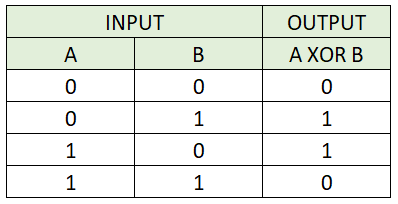

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

target_data = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=1000)

scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

La arquitectura de nuetra Red Neuronal del ejemplo es algo así:

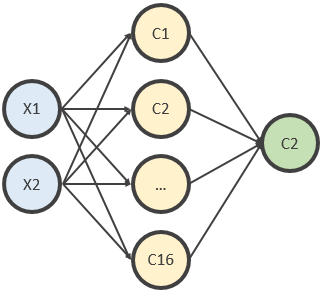

#Afinando parámetros de la red neuronal


1.   Cantidad de capas de la red.
2.   Cantidad de neuronas en cada capa de la red.
3.   Funciones de activación de cada capa.
4.   Al compilar el modelo definir las funciones de pérdida, optimización y métricas.
5.   Cantidad de iteraciones de entrenamiento.



#Guardando la red y usándola -de verdad-

In [ ]:
# serializar el modelo a JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
model.save_weights("model.h5")
print("Modelo Guardado!")

In [ ]:
# mas tarde...
from keras.models import model_from_json

# cargar json y crear el modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Cargado modelo desde disco.")

# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

In [ ]:
loaded_model.predict([[0, 0], [1, 0]]).round()